# Business Problem
New protein powder launch -> Give Data -> Analayze past already products -> Which ones are famous/most rated? -> What features have these products in common? Applying those features on the product that has to be launched.

# Exploring the Dataset

In [1]:
# Import required libraries
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option('display.max_columns', None)

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Load the data
whey_data = pd.read_json('./../data/data.json')
whey_data.head(2)

,id,rank,name,weight,flavour,supplimentName,categoryName,secondaryCategory,description,isPack,isJustLaunched,isPublished,isExclusiveVariant,productPageCreatedAt,goal,consumedWith,Attributes,vendorId,vendorName,brandName,marketedBy,manufacturer,mrp,offerPrice,mrpOfferPriceDiff,discount,currDiscountPercent,isReviewEnabled,rating,totalRating,totalReviews,reviewSlug,isPreOrderAllowed,vendorHkFulfilled,isOrderEnabled,returnDays,numberOfOffers,tags,isConsultProduct,percentClaimed,infoTags,expiryDate,loyaltyPercent,keyPoint1,keyPoint2,keyPoint3,keyPoint4,keyPoint5,storeVariantIdsInPack,groups,urlFragment,offerAllowed,primaryCategoryRank,secondaryCategoryRank,leafCategoryRank,freebieNm,freebieDetails,flashDealActive,loyaltyCash,batches,ingredients,fssaiCode,isEmiAvailable,emiStartsWith,emiOptions,paymentOffers,paymentModes,isKitVariant,isNutrapack,country,shelfLife,importedBy,maxDispatch,isBestPrice,lastUpdatedAt,pageSeo,no_feat_rtng,review_features,reviews
0,128526,200000,MuscleBlaze Biozyme Performance Whey 2 kg & Da...,None,None,None,Multivitamins - General|Whey Proteins,None,None,True,False,NaN,False,None,None,None,{},NaN,None,MuscleBlaze,NaN,None,6798,5198,1600,23,NaN,False,4.509719,3593,0,None,False,False,True,0,0,None,False,0,[],None,NaN,MuscleBlaze ® Biozyme Performance Whey is a La...,MB Biozyme Performance Whey comes with a propr...,The leading Biozyme range by MuscleBlaze ® are...,Power of Biozyme: MuscleBlaze Biozyme Daily Mu...,Punch of Vitamins and Minerals: Vitamins and M...,"[164773, 194572]",{},/muscleblaze-biozyme-performance-whey-2-kg-n-d...,NaN,NaN,NaN,NaN,None,None,NaN,NaN,None,None,NaN,NaN,NaN,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,None,None,NaN,None,None
1,236399,99999,"MuscleBlaze Biozyme Performance Whey, 4.4 lb ...",4.4lb,biscoffcookie,Biozyme Performance Whey,Whey Proteins,Proteins,None,False,False,1.0,True,2023-11-14T05:30:00,Muscle Building,None,"{'Serving Size': ['38.5 g'], 'Protein % per Se...",291.0,Bright Lifecare Pvt Ltd,MuscleBlaze,NaN,"{'Manufacturer': 'Sapiens Labs, Village Dhana ...",5499,3999,1500,27,NaN,True,4.497217,3413,3413,muscleblaze-biozyme-performance-whey-4-4-lb-bi...,False,True,True,0,0,[rank_1_cat],False,0,[],2025-05-05T05:30:00,4.0,"WINNER, PRODUCT OF THE YEAR, SPORTS NUTRITION ...","INFORMED CHOICE, UK & LABDOOR, USA- TESTED & C...",ENHANCED ABSORPTION FORMULA (EAF ®) in MB Bioz...,FIRST CLINICALLY TESTED Whey Protein offerings...,"SCOOP ON TOP- this ""Asia Star"" award-winning i...",[],"{'Special Traits': [{'key': 'Lifestage', 'val'...",/muscleblaze-biozyme-performance-whey/SP-88093,0.0,0.0,0.0,0.0,"[MuscleBlaze Limited Edition Shubman Shaker, ...","[{'dfQty': 1, 'urlFragment': '/muscleblaze-lim...",0.0,160.0,[],[],1.001506e+13,0.0,0.0,None,[{'termAndCondtion': '<div> <ul> <li> ...,"[{'name': 'Simpl', 'numberOfInstalments': 3}]",0.0,0.0,India,18.0,NaN,2.0,1.0,2023-11-20T05:30:00,"{'metaKeywrd': None, 'footer': None, 'metaDesc...",0.0,"[{'featureName': 'Taste', 'featureRatingCount'...","[{'id': 399636, 'date': '2022-06-23T14:13:03',..."


## Basic Info About the dataset

In [3]:
whey_data.shape

(413, 79)

In [4]:
whey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 79 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     413 non-null    int64  
 1   rank                   413 non-null    int64  
 2   name                   413 non-null    object 
 3   weight                 118 non-null    object 
 4   flavour                118 non-null    object 
 5   supplimentName         118 non-null    object 
 6   categoryName           413 non-null    object 
 7   secondaryCategory      118 non-null    object 
 8   description            22 non-null     object 
 9   isPack                 413 non-null    bool   
 10  isJustLaunched         413 non-null    bool   
 11  isPublished            118 non-null    float64
 12  isExclusiveVariant     413 non-null    bool   
 13  productPageCreatedAt   118 non-null    object 
 14  goal                   118 non-null    object 
 15  consum

There exists a significant num of fields in which the count is only 118 and the values for rest of the products is missing, why so?

In [5]:
# data manipulation for nested values
whey_data['Attributes'] = whey_data['Attributes'].apply(lambda x: None if not x else x)
whey_data['infoTags'] = whey_data['infoTags'].apply(lambda x: None if not x else x)
whey_data['storeVariantIdsInPack'] = whey_data['storeVariantIdsInPack'].apply(lambda x: None if not x else x)
whey_data['groups'] = whey_data['groups'].apply(lambda x: None if not x else x)
whey_data['freebieNm'] = whey_data['freebieNm'].apply(lambda x: None if not x else x)
whey_data['freebieDetails'] = whey_data['freebieDetails'].apply(lambda x: None if not x else x)
whey_data['batches'] = whey_data['batches'].apply(lambda x: None if not x else x)
whey_data['ingredients'] = whey_data['ingredients'].apply(lambda x: None if not x else x)

In [6]:
whey_data.describe(include= 'all')

,id,rank,name,weight,flavour,supplimentName,categoryName,secondaryCategory,description,isPack,isJustLaunched,isPublished,isExclusiveVariant,productPageCreatedAt,goal,consumedWith,Attributes,vendorId,vendorName,brandName,marketedBy,manufacturer,mrp,offerPrice,mrpOfferPriceDiff,discount,currDiscountPercent,isReviewEnabled,rating,totalRating,totalReviews,reviewSlug,isPreOrderAllowed,vendorHkFulfilled,isOrderEnabled,returnDays,numberOfOffers,tags,isConsultProduct,percentClaimed,infoTags,expiryDate,loyaltyPercent,keyPoint1,keyPoint2,keyPoint3,keyPoint4,keyPoint5,storeVariantIdsInPack,groups,urlFragment,offerAllowed,primaryCategoryRank,secondaryCategoryRank,leafCategoryRank,freebieNm,freebieDetails,flashDealActive,loyaltyCash,batches,ingredients,fssaiCode,isEmiAvailable,emiStartsWith,emiOptions,paymentOffers,paymentModes,isKitVariant,isNutrapack,country,shelfLife,importedBy,maxDispatch,isBestPrice,lastUpdatedAt,pageSeo,no_feat_rtng,review_features,reviews
count,413.000000,413.000000,413,118,118,118,413,118,22,413,413,118.0,413,118,118,53,110,118.0,118,413,0.0,118,413.000000,413.000000,413.000000,413.000000,0.0,413,413.000000,413.000000,413.000000,118,413,413,413,413.0,413.0,118,413,413.0,33,116,118.000000,411,411,409,407,197,295,118,413,118.000000,118.0,118.0,118.0,7,7,118.0,118.000000,0,0,1.140000e+02,118.000000,118.000000,44,118,118,118.0,118.0,118,118.000000,0.0,118.0,118.000000,118,118,118.000000,118,118
unique,NaN,NaN,329,15,58,21,52,3,14,2,1,NaN,2,97,6,2,68,NaN,1,5,NaN,5,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,118,1,2,1,NaN,NaN,12,1,NaN,3,75,NaN,87,94,124,116,70,281,118,224,NaN,NaN,NaN,NaN,2,3,NaN,NaN,0,0,NaN,NaN,NaN,5,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,21,65,NaN,11,22
top,NaN,NaN,MuscleBlaze Biozyme Performance Whey 2 kg & MB...,2.2 lb,Chocolate,Biozyme Performance Whey,Whey Proteins,Proteins,<div>\r\n\t<strong>Biozyme Performance Whey- R...,True,False,NaN,False,2016-09-22T05:30:00,Muscle Building,Water or Milk,"{'Serving Size': ['35 g'], 'Protein % per Serv...",NaN,Bright Lifecare Pvt Ltd,MuscleBlaze,NaN,"{'Manufacturer': 'Sapiens Labs, Village Dhana ...",NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,muscleblaze-biozyme-performance-whey-4-4-lb-bi...,False,False,True,NaN,NaN,[rank_1_cat],False,NaN,[{'info_tag_display_name': 'Whey Protein Conce...,2025-04-26T05:30:00,NaN,MuscleBlaze Creatine Monohydrate contains 100%...,Each serving of MuscleBlaze Creatine Monohydra...,ENHANCED ABSORPTION FORMULA (EAF ®) in MB Bioz...,Each serving of MuscleBlaze Creatine Monohydra...,"SCOOP ON TOP- this ""Asia Star"" award-winning i...","[164773, 194572]","{'Special Traits': [{'key': 'Lifestage', 'val'...",/muscleblaze-biozyme-performance-whey/SP-88093,NaN,NaN,NaN,NaN,"[bGREEN Shaker, Transparent 500 ml ]","[{'dfQty': 1, 'urlFragment': '/bgreen-shaker/S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[American Express, Axis Bank, Bajaj Finserv Li...",[{'termAndCondtion': '<div> <ul> <li> ...,"[{'name': 'Simpl', 'numberOfInstalments': 3}]",NaN,NaN,India,NaN,NaN,NaN,NaN,2023-11-20T05:30:00,"{'metaKeywrd': None, 'footer': None, 'metaDesc...",NaN,"[{'featureName': 'Taste', 'featureRatingCount'...","[{'id': 399636, 'date': '2022-06-23T14:13:03',..."
freq,NaN,NaN,7,41,18,26,75,107,6,295,413,NaN,401,3,94,34,7,NaN,118,348,NaN,80,NaN,NaN,NaN,NaN,NaN,295,NaN,NaN,NaN,1,413,295,413,NaN,NaN,35,413,NaN,20,6,NaN,27,27,19,18,37,2,1,26,NaN,NaN,NaN,NaN,6,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,118,118,NaN,NaN,118,NaN,NaN,NaN,NaN,69,24,NaN,68,26
mean,135072.593220,143639.486683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,291.0,NaN,NaN,NaN,NaN,5394.058111,4030.118644,1363.939467,24.644068,NaN,NaN,4.409189,2320.358354,270.515738,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,3.898305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.711864,0.0,0.0,0.0,NaN,NaN,0.0,142.177966,NaN,NaN,1.001506e+13,0.372881,108.992712,NaN,NaN,NaN,0.0,0.0,NaN,17.491525,NaN,2.0,0.288136,NaN,NaN,67.872881,NaN,NaN
std,28870.898062,89617.120185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,2720.7758

Findings:
- Rank field seems to be wrong as the minimum rank is 1 and the max rank is 200,000 where as we have only 413 products in the dataframe.
- There are some columns for which we have 0 values (need to drop them).
- Minimum mrp is given as 139 which is very odd as a protein powder is generally expensive.
- The minimum value of rating is 0, why so? (possibly the associated product has 0 reviews)
- The maximum value of rating is 5, seems odd for a product to have full 5 star rating.

Products with mrp less than Rs 1,000

In [7]:
whey_data[whey_data.mrp < 1000][['name', 'mrp']].to_records(index= False)

rec.array([('MuscleBlaze Protein Bar 10 g protein 6 bars  Cookies & Cream & Choco Almond Combo', 900),
           ("MuscleBlaze Beginner's Protein Powder,  0.88 lb  Chocolate", 849),
           ('MuscleBlaze Protein Bar (10 gm Protein),  6 bar(s)  Choco Cranberry', 450),
           ('MuscleBlaze Biozyme Performance Whey,  0.079 lb  Rich Chocolate', 139),
           ('MuscleBlaze Protein Bar (10 gm Protein),  6 bar(s)  Choco Almond', 450),
           ('MuscleBlaze Protein Bar (10 gm Protein),  6 bar(s)  Cookies & Cream', 450),
           ('MuscleBlaze Protein Bar (20 gm Protein),  6 bar(s)  Choco Almond', 780),
           ('MB Fuel One Sports Protein,  0.88 lb  Berry Blast', 799),
           ('MB Fuel One Sports Protein,  0.88 lb  Chocolate', 799),
           ('MuscleBlaze Protein Bar (20 gm Protein),  6 bar(s)  Cookies & Cream', 780)],
          dtype=[('name', 'O'), ('mrp', '<i8')])

- There are also protein bars and not only protein powders (need to drop them as it is out of scope for this analysis).<br>
- There exists an extremely cheap protein powder (1-serving).<br>

In [8]:
whey_data = whey_data[~whey_data.name.str.contains('Protein Bar')].reset_index(drop= True)
whey_data.shape

(401, 79)

Records where suppliment name is not given

In [9]:
whey_data[whey_data.supplimentName.isna()][['rank', 'name']].to_records(index= False)

rec.array([(200000, 'MuscleBlaze Biozyme Performance Whey 2 kg & Daily Multivit 90 Tabs Combo'),
           (200000, 'MuscleBlaze 80% Raw Whey Protein 1 kg & PRE Workout 200 Xtreme Fruit Punch 0.22 lb Combo'),
           (200000, 'MuscleBlaze 80% Raw Whey Protein 1 kg & High Protein Peanut Butter 340g Combo'),
           (200000, 'MuscleBlaze 80% Raw Whey Protein 2 Kg & Shaker Combo'),
           (200000, 'MuscleBlaze 80% Raw Whey Protein 1 kg & Fish Oil 30 Caps Combo'),
           (200000, 'MuscleBlaze 80% Raw Whey Protein 1 kg & Creatine Monohydrate 0.55 lb Combo'),
           (200000, 'MuscleBlaze Biozyme Performance Whey 1 kg & Creatine Monohydrate 0.22 lb Combo'),
           (200000, 'MuscleBlaze Biozyme Iso-Zero 2 Kg & L-Carnitine 450 ml Lemon Lime Combo'),
           (200000, 'MuscleBlaze Biozyme Iso-Zero 2 Kg & PRE Workout 200 Xtreme Combo'),
           (200000, 'MuscleBlaze Biozyme Iso-Zero 2 Kg & MB VITE 60 Tabs Combo'),
           (200000, 'MuscleBlaze Biozyme Performance Wh

Upon analyzing the above values, it was noted that there are also combos, stacks and packs in the data and they all have the same rank i.e. 200000.

In [10]:
missing_info_df = whey_data[whey_data.supplimentName.isna()]  # separating the missing data

In [11]:
def check(product_name):
    for word in ['combo', 'pack of', 'stack']:
        if word in product_name.lower():
            return True
    return False

print('No. of products remaining in our dataset:', len(whey_data))
print('No. of rows for which majority of fields are missing:', len(missing_info_df))
print('No. of products which are a combo:', len(missing_info_df[missing_info_df.name.apply(check)]))
print('No. of products which are not a combo:', len(whey_data) - len(missing_info_df[missing_info_df.name.apply(check)]))

No. of products remaining in our dataset: 401
No. of rows for which majority of fields are missing: 288
No. of products which are a combo: 286
No. of products which are not a combo: 115


Products which were not considered as a combo in the above cell.

In [12]:
missing_info_df[~missing_info_df.name.apply(check)].name.values

array(["MuscleBlaze Beginner's Protein 2 Kg & Fish Oil 30 Caps",
       'MuscleBlaze Biozyme Whey Protein 4.4 lb with High Protein Peanut Butter Unsweetened Crunchy'],
      dtype=object)

Now, on manual inspecting these 2 products also seems like a combo. So, let's just exlude them manually.

In [13]:
def check(product_name):
    for word in ['combo', 'pack of', 'stack']:
        if word in product_name.lower():
            return True
        
    if product_name in [
        "MuscleBlaze Beginner's Protein 2 Kg & Fish Oil 30 Caps", 
        'MuscleBlaze Biozyme Whey Protein 4.4 lb with High Protein Peanut Butter Unsweetened Crunchy'
    ]:
        return True
        
    return False

print('No. of products remaining in our dataset:', len(whey_data))
print('No. of rows for which majority of fields are missing:', len(missing_info_df))
print('No. of products which are a combo:', len(missing_info_df[missing_info_df.name.apply(check)]))
print('No. of products which are not a combo:', len(whey_data) - len(missing_info_df[missing_info_df.name.apply(check)]))

No. of products remaining in our dataset: 401
No. of rows for which majority of fields are missing: 288
No. of products which are a combo: 288
No. of products which are not a combo: 113


In [14]:
suppliment_df = whey_data.drop(index= missing_info_df.index)
combos_df = missing_info_df
suppliment_df.shape, combos_df.shape

((113, 79), (288, 79))

## Exploring Data Fields

#### Numerical Data Fields

##### - rank

By desk research, It was found that the rank is based on all the muscleblaze products and not only limited to protein powders.

In [15]:
suppliment_df['rank'].values

array([99999, 99999, 99999,   573,   538,   516,   505,   491,   486,
         485,   477,   476,   472,   467,   465,   441,   437,   427,
         419,   403,   391,   387,   375,   350,   344,   341,   335,
         335,   334,   333,   318,   309,   294,   293,   292,   283,
         281,   280,   276,   274,   273,   265,   253,   227,   225,
         221,   220,   217,   216,   214,   214,   202,   199,   197,
         196,   186,   183,   182,   181,   178,   172,   165,   163,
         162,   159,   154,   143,   141,   122,   113,   108,   104,
          96,    93,    92,    89,    86,    86,    84,    81,    75,
          73,    72,    65,    59,    57,    56,    55,    46,    43,
          42,    40,    39,    36,    35,    34,    31,    25,    22,
          20,    15,    19,    17,    16,    11,     1,    21,    28,
          12,     8,     7,    10,     5], dtype=int64)

There exists 3 abnormal products' rank i.e. 99999

In [16]:
suppliment_df[suppliment_df['rank'] == 99999].name.values

array(['MuscleBlaze Biozyme Performance Whey,  4.4 lb  Biscoff Cookie',
       'MuscleBlaze 80% Raw Whey Protein Supplement Powder,  1.65 lb  Unflavoured',
       'MuscleBlaze 100% Whey Protein Supplement Powder with Digestive Enzyme,  8.8 lb  114 Servings (Vanilla)'],
      dtype=object)

There could be many possible reasons that why these products are not given any rank but after anaylzing these products on further basis (like to check whether these products are discontinued or not, are these products newly launched, etc.), it was not possible to findout a valid reason for the same.

As, we are analyzing only the protein powders and it is evident that we have all the protein powders that is sold by MuscleBlaze in our dataset. So, we can just sort the ranks and give them new ranks.

In [17]:
suppliment_df.sort_values('rank', inplace= True)
print('Past Ranks:', suppliment_df['rank'].to_list())

suppliment_df['rank'] = [i for i in range(1, len(suppliment_df) - 2)] + [99999] * 3
print('New Ranks:', suppliment_df['rank'].to_list())

Past Ranks: [1, 5, 7, 8, 10, 11, 12, 15, 16, 17, 19, 20, 21, 22, 25, 28, 31, 34, 35, 36, 39, 40, 42, 43, 46, 55, 56, 57, 59, 65, 72, 73, 75, 81, 84, 86, 86, 89, 92, 93, 96, 104, 108, 113, 122, 141, 143, 154, 159, 162, 163, 165, 172, 178, 181, 182, 183, 186, 196, 197, 199, 202, 214, 214, 216, 217, 220, 221, 225, 227, 253, 265, 273, 274, 276, 280, 281, 283, 292, 293, 294, 309, 318, 333, 334, 335, 335, 341, 344, 350, 375, 387, 391, 403, 419, 427, 437, 441, 465, 467, 472, 476, 477, 485, 486, 491, 505, 516, 538, 573, 99999, 99999, 99999]
New Ranks: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 99999, 

In [18]:
combos_df['rank'].unique()

array([200000], dtype=int64)

For all the combos we have a single rank which is insignificant.

##### - weight

In [19]:
suppliment_df.weight.unique()

array(['4.4 lb', '4.4lb', '2.2lb', '2.2 lb', '4 lb', '3.85 lb', '8.8lb',
       '8.8 lb', '0.88 lb', '1.87 lb', '1.1 lb', '1.65 lb', '0.079 lb',
       '1.32 lb'], dtype=object)

Convert weight from lb to kg numerical column.

In [20]:
suppliment_df['weight'] = suppliment_df.weight.apply(lambda x: float(x.strip('lb')) / 2.2).round(2)
suppliment_df.weight.unique()

array([2.  , 1.  , 1.82, 1.75, 4.  , 0.4 , 0.85, 0.5 , 0.75, 0.04, 0.6 ])

##### - mrp and offer price

In [21]:
suppliment_df[['mrp', 'offerPrice']].describe()

,mrp,offerPrice
count,113.000000,113.000000
mean,4876.168142,3736.141593
std,3025.527247,2331.553375
min,139.000000,139.000000
25%,2599.000000,1875.000000
50%,4199.000000,3249.000000
75%,6669.000000,5099.000000
max,15699.000000,10999.000000


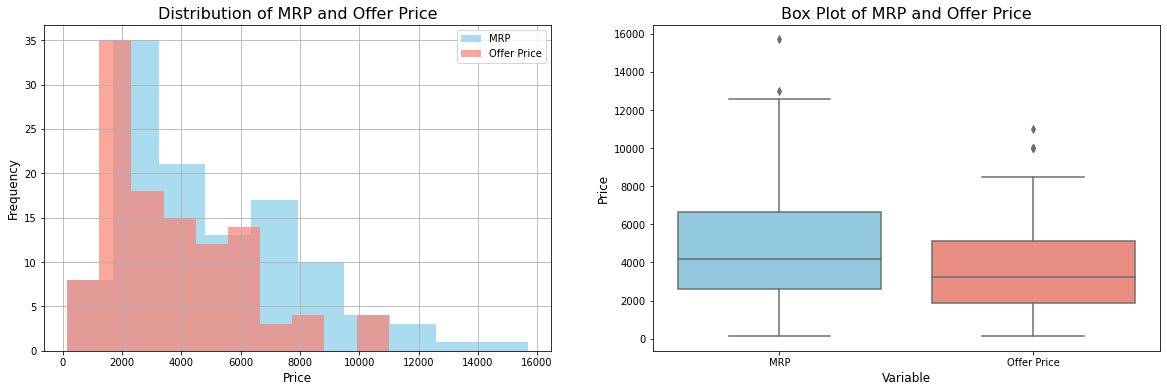

In [22]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize= (20, 6))

axes[0].hist(suppliment_df['mrp'], alpha= 0.7, label= 'MRP', color= 'skyblue')
axes[0].hist(suppliment_df['offerPrice'], alpha= 0.7, label= 'Offer Price', color= 'salmon')
axes[0].set_title('Distribution of MRP and Offer Price', fontsize= 16)
axes[0].set_xlabel('Price', fontsize= 12)
axes[0].set_ylabel('Frequency', fontsize= 12)
axes[0].grid(True)
axes[0].legend()

sns.boxplot(data= suppliment_df[['mrp', 'offerPrice']], palette= ['skyblue', 'salmon'], ax= axes[1])
axes[1].set_title('Box Plot of MRP and Offer Price', fontsize= 16)
axes[1].set_xlabel('Variable', fontsize= 12)
axes[1].set_ylabel('Price', fontsize= 12)
axes[1].set_xticklabels(['MRP', 'Offer Price']);


Findings:
- Standard deviation is high.
- The data is right skweed i.e. not normal distribution.
-

In [23]:
suppliment_df.sort_values('mrp', ascending= False).head()[['name', 'mrp']].to_records(index= False)

rec.array([('MuscleBlaze Whey Gold Protein Isolate with Digezyme,  8.8 lb  Rich Milk Chocolate', 15699),
           ('MuscleBlaze Biozyme Whey Protein,  8.8 lb  Rich Milk Chocolate', 12999),
           ('MuscleBlaze 100% Whey Protein Supplement Powder with Digestive Enzyme,  8.8 lb  114 Servings (Vanilla)', 12549),
           ('MuscleBlaze 100% Whey Protein Supplement Powder with Digestive Enzyme,  8.8 lb  114Servings (Rich Milk Chocolate)', 12549),
           ('MuscleBlaze Whey Performance Protein,  8.8 lb  Chocolate', 11599)],
          dtype=[('name', 'O'), ('mrp', '<i8')])

Products with the highest mrps are of 8.8 lbs.

##### - discount

In [24]:
suppliment_df.discount.describe()

count    113.000000
mean      22.973451
std        4.910739
min        0.000000
25%       21.000000
50%       22.000000
75%       25.000000
max       47.000000
Name: discount, dtype: float64

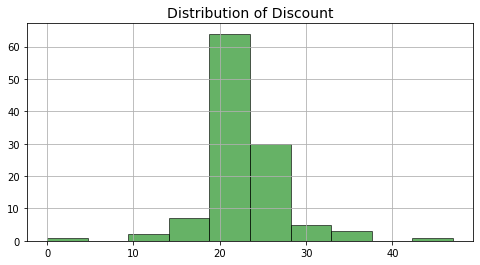

In [25]:
plt.figure(figsize= (8,4))
suppliment_df.discount.hist(alpha= 0.6, color= 'green', edgecolor= 'black')
plt.title('Distribution of Discount', fontsize= 14);

In [26]:
suppliment_df[suppliment_df.discount == 0].name.values

array(['MuscleBlaze Biozyme Performance Whey,  0.079 lb  Rich Chocolate'],
      dtype=object)

##### - rating

In [27]:
suppliment_df.rating.min()

0.0

minimum rating value is 0, let's check the records with 0 rating

In [28]:
suppliment_df[suppliment_df.rating == 0][['id', 'rank', 'name', 'categoryName', 'isReviewEnabled', 'rating', 'totalRating', 'totalReviews']]

,id,rank,name,categoryName,isReviewEnabled,rating,totalRating,totalReviews
334,150409,64,"bGREEN Plant Protein, Chocolate 2.2 lb",Plant Proteins,True,0.0,0,36
311,161007,87,"bGREEN Plant Protein, Cafe Mocha 2.2 lb",Plant Proteins,True,0.0,0,36
294,163383,104,"bGREEN Plant Protein, Strawberry 2.2 lb",Plant Proteins,True,0.0,0,36
293,151525,105,"bGREEN Plant Protein, Chocolate 1.1 lb",Plant Proteins,True,0.0,0,36
291,161009,107,"bGREEN Plant Protein, Cafe Mocha 1.1 lb",Plant Proteins,True,0.0,0,36
288,163385,110,"bGREEN Plant Protein, Strawberry 1.1 lb",Plant Proteins,True,0.0,0,36


There seems to be an error in rating and totalRating column as there exists reviews that means customers have rated the product and also all these products have the same num of reviews which is unlikely to happen.

In [29]:
set([review['productId'] for review in suppliment_df.at[334, 'reviews']])

{150409, 151525, 154515, 161007, 161009, 163383, 163385}

After analyzing the reviews, it was noted that the reviews given are not particular to that product only but also contains all the reviews of it's other variants as well.

Filtering reviews particular to the products only.

In [30]:
suppliment_df['reviews'] = suppliment_df.apply(lambda row: [review for review in row['reviews'] if review['productId'] == row['id']], axis= 1)
suppliment_df['totalReviewsNew'] = suppliment_df.reviews.apply(lambda x: len(x))

In [31]:
suppliment_df[['totalReviews', 'totalReviewsNew']].describe()

,totalReviews,totalReviewsNew
count,113.000000,113.000000
mean,981.513274,54.876106
std,1351.871422,92.233219
min,1.000000,0.000000
25%,122.000000,5.000000
50%,267.000000,17.000000
75%,825.000000,75.000000
max,3413.000000,570.000000


After separating the reviews product-wise, a huge drop in values is noted.

Products with 0 reviews

In [32]:
suppliment_df[suppliment_df.totalReviewsNew == 0][['id', 'rank', 'name', 'categoryName', 'isReviewEnabled', 'rating', 'totalRating', 'totalReviews', 'totalReviewsNew']]

,id,rank,name,categoryName,isReviewEnabled,rating,totalRating,totalReviews,totalReviewsNew
346,74478,52,"MuscleBlaze Whey Active, 2.2 lb Chocolate",Whey Protein for Beginners,True,5.000000,1,1,0
344,74479,54,"MuscleBlaze Whey Active, 4.4 lb Chocolate",Whey Protein for Beginners,True,5.000000,1,1,0
302,74480,96,MuscleBlaze 100% Whey Protein Supplement Powde...,Whey Proteins,True,4.458333,120,122,0
300,131089,98,MuscleBlaze 100% Whey Protein Supplement Powde...,Whey Proteins,True,4.458333,120,122,0
1,236399,99999,"MuscleBlaze Biozyme Performance Whey, 4.4 lb ...",Whey Proteins,True,4.497217,3413,3413,0


So, now the rating needs to be changed as well as the rating is based on all the variants but it is not truly correct as a flavour may have 0 reviews or ratings but can be given false rating due to other variants and there can be cases where a flavour can have not that good rating as compared to its other flavour and following the same rating logic may assign the product flavour false rating.

In [33]:
suppliment_df['rating'] = suppliment_df.reviews.apply(lambda x: np.mean([review['rating'] for review in x]) if x else 0)
suppliment_df.drop(columns= ['totalReviews'], inplace= True)
suppliment_df.rename(columns= {'totalReviewsNew': 'totalReviews'}, inplace= True)
suppliment_df['totalRating'] = suppliment_df.totalReviews.values

##### - storeVariantIdsInPack

In [34]:
combos_df[['name', 'storeVariantIdsInPack']].head()

,name,storeVariantIdsInPack
0,MuscleBlaze Biozyme Performance Whey 2 kg & Da...,"[164773, 194572]"
2,MuscleBlaze 80% Raw Whey Protein 1 kg & PRE Wo...,"[77192, 200194]"
3,MuscleBlaze 80% Raw Whey Protein 1 kg & High P...,"[77192, 166549]"
4,MuscleBlaze 80% Raw Whey Protein 2 Kg & Shaker...,"[90657, 163851]"
5,MuscleBlaze 80% Raw Whey Protein 1 kg & Fish O...,"[77192, 176804]"


Making a separate column to store the number of combos the product have.

In [35]:
combo_count = {}
for product_id in suppliment_df['id'].unique():
    combo_count[product_id] = 0

for combo in combos_df.storeVariantIdsInPack.values:
    for product_id in combo:
        if product_id in combo_count:
            combo_count[product_id] += 1

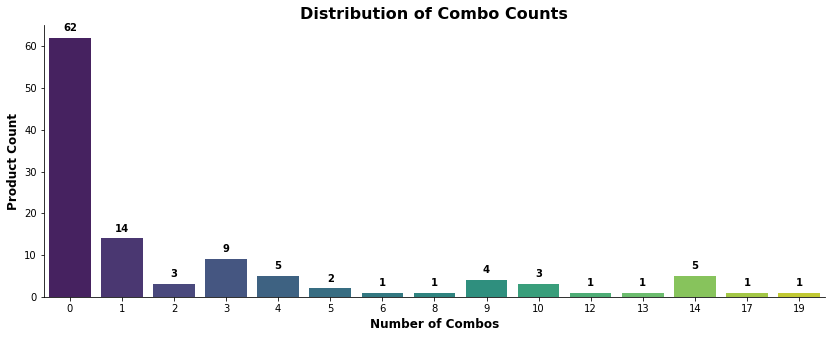

In [36]:
suppliment_df['comboCount'] = suppliment_df['id'].apply(lambda x: combo_count[x])

plt.figure(figsize=(14, 5))
ax = sns.barplot(
    data= suppliment_df.comboCount.value_counts().to_frame('Count').rename_axis('No. of Combos').reset_index(),
    x= 'No. of Combos', y= 'Count', palette= 'viridis'
)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, fontweight='bold')

sns.despine()
plt.title('Distribution of Combo Counts', fontsize= 16, fontweight= 'bold')
plt.xlabel('Number of Combos', fontsize= 12, fontweight= 'bold')
plt.ylabel('Product Count', fontsize= 12, fontweight= 'bold');


##### - freebieCount (New Data Field)

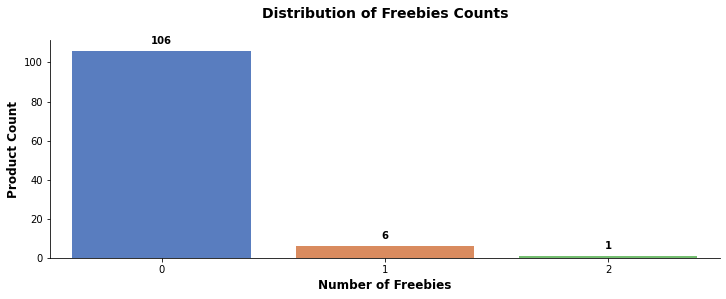

In [37]:
suppliment_df['freebieCount'] = suppliment_df.freebieNm.apply(lambda x: len(x) if x else 0)

plt.figure(figsize=(12, 4))
ax = sns.barplot(
    data= suppliment_df['freebieCount'].value_counts().to_frame('Count').rename_axis('No. of Freebies').reset_index(),
    x= 'No. of Freebies', y= 'Count', palette= 'muted'
)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, fontweight='bold')

sns.despine()
plt.title('Distribution of Freebies Counts\n', fontsize= 14, fontweight= 'bold')
plt.xlabel('Number of Freebies', fontsize= 12, fontweight= 'bold')
plt.ylabel('Product Count', fontsize= 12, fontweight= 'bold');

##### - emiStartsWith

In [38]:
suppliment_df.emiStartsWith.describe()

count    113.000000
mean     113.815398
std      151.867113
min        0.000000
25%        0.000000
50%        0.000000
75%      247.230000
max      533.300000
Name: emiStartsWith, dtype: float64

##### Insignifant Columns

In [39]:
suppliment_df.drop(columns= ['currDiscountPercent', 'returnDays', 'numberOfOffers', 'percentClaimed', 'loyaltyPercent', 'loyaltyCash', 'maxDispatch'], inplace= True)

#### Categorical Data Fields

##### flavour

In [40]:
suppliment_df.flavour.unique()

array(['Rich Chocolate', 'chocolatefudge', 'chocolatehazelnut',
       'unflavoured', 'chocolate', 'Chocolate Hazelnut',
       'richmilkchocolate', '51 Servings (Rich Milk Chocolate)',
       'Blue Tokai Coffee', 'Unflavoured', 'Triple Chocolate',
       'richchocolate', 'lowcarbicecreamchocolate', 'Magical Mango',
       'Chocolate', 'Chocolate Peanut Butter',
       'Zero Carb Strawberry Delight', 'Kesar Thandai',
       'Rich Milk Chocolate', 'French Vanilla Crème',
       'Low Carb Tropical Mango', 'Kesar Kulfi',
       '57 Servings (Rich Milk Chocolate)', 'Cafe Mocha', 'Mango',
       'Gourmet Vanilla', 'Ice Cream Chocolate',
       '114Servings (Rich Milk Chocolate)', 'Berry Blast',
       '30 Servings (Chocolate)', 'Refill Pack Rich Chocolate',
       'French Vanilla Creme', 'Refill Pack Magical Mango',
       'Chocolate Fudge', 'Low Carb Ice Cream Chocolate',
       'Refill Pack Unflavoured', 'Cookies & Cream', 'Vanilla',
       'Low Carb Cookies & Cream', 'Mocha Cappuccino',


Cleaning and normalizing flavour names

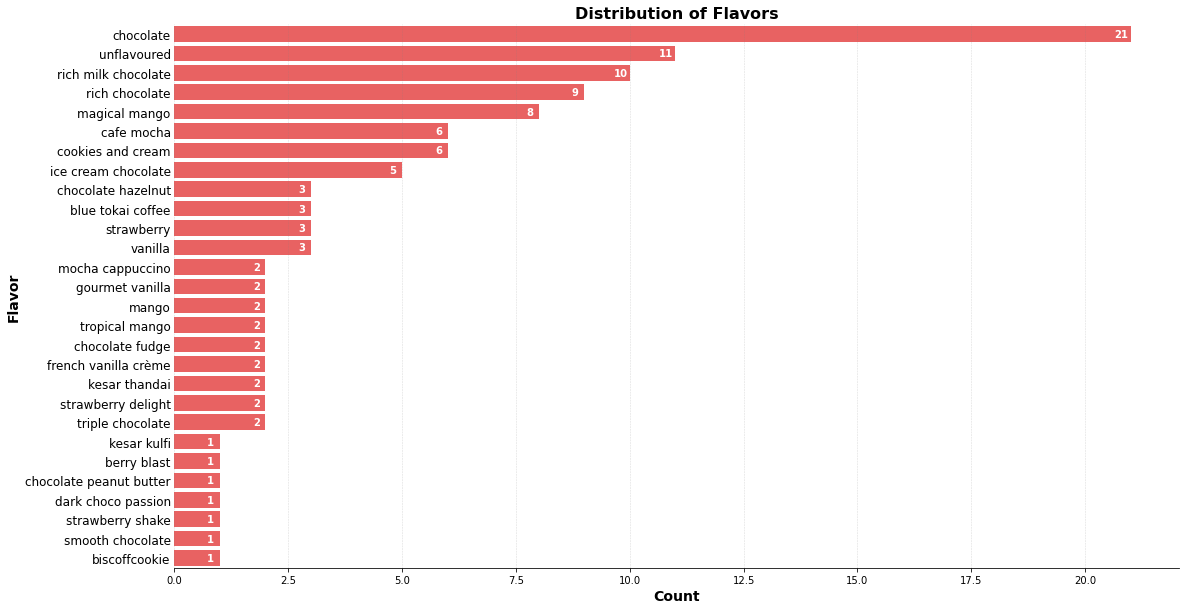

In [41]:
def standardize_flavours():
    suppliment_df['flavour'] = suppliment_df.flavour.apply(lambda x: re.findall(r'\((.*?)\)', x)[0].lower() if re.findall(r'\((.*?)\)', x) else x.lower())
    to_replace = {val.replace(' ', ''): val for val in suppliment_df.flavour.unique() if ' ' in val and val.replace(' ', '') in suppliment_df.flavour.unique()}
    suppliment_df['flavour'] = suppliment_df.flavour.replace(to_replace= to_replace)
    suppliment_df['flavour'] = suppliment_df.flavour.apply(lambda x: x.replace('low carb', '').replace('zero carb', '').replace('refill pack', '').replace('&', 'and').replace('creme', 'crème').strip())

standardize_flavours()

plt.figure(figsize= (18, 10))
ax = sns.countplot(y= 'flavour', data= suppliment_df, order= suppliment_df['flavour'].value_counts().index, color= 'red', alpha= 0.7)

for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() - 0.2, p.get_y() + p.get_height() / 2),
                ha= 'center', va= 'center', fontsize= 10, color= 'white', fontweight= 'bold')

ax.grid(axis= 'x', linestyle= '--', alpha= 0.3, color= 'grey', linewidth= 0.5)

sns.despine(left= True)
ax.tick_params(axis= 'y', length= 0)

plt.title('Distribution of Flavors', fontsize= 16, fontweight= 'bold')
plt.xlabel('Count', fontsize= 14, fontweight= 'bold')
plt.ylabel('Flavor', fontsize= 14, fontweight= 'bold')
plt.yticks(fontsize= 12);


##### Packaging (New Field)

In [42]:
print(suppliment_df.groups.values[0])

{'Other Traits': [{'key': 'Product Code/UPC', 'val': '8906116953181'}, {'key': 'Weight Bucket', 'val': '4.4'}, {'key': 'Flavour Base', 'val': 'Chocolate'}, {'key': 'Protein per Serving Bucket', 'val': '25.0'}], 'Additional Information': [{'key': 'Country of Origin', 'val': 'India'}, {'key': 'Flavour', 'val': 'Rich Chocolate'}, {'key': 'Brand Origin', 'val': 'Indian'}, {'key': 'Goal', 'val': 'Muscle Building,Muscle Recovery'}, {'key': 'Form', 'val': 'Powder'}, {'key': 'Packaging', 'val': 'Jar'}], 'Special Traits': [{'key': 'Lifestage', 'val': 'Adult'}, {'key': 'Gender', 'val': 'Men,Women'}], 'Nutritional info for whey proteins': [{'key': 'Protein', 'val': '25 g'}, {'key': 'BCAA', 'val': '5.51 g'}, {'key': 'EAA', 'val': '11.75 g'}, {'key': 'Glutamic acid', 'val': '4.38 g'}, {'key': 'Kcal', 'val': '140.94'}, {'key': 'Protein % per Serving', 'val': '69.0'}], 'General Traits': [{'key': 'Weight', 'val': '4.4 lb'}, {'key': 'Weight (kg)', 'val': '2.0'}, {'key': 'Protein % per Serving', 'val': 

Upon inspecting the group value, other than the data we already have, `packaging` can be the only extra valuable information from group field for this analysis.

In [43]:
suppliment_df['packaging'] = suppliment_df.groups.apply(lambda x: [i for i in x['Additional Information'] if i['key'] == 'Packaging'][0]['val'])
suppliment_df.packaging.value_counts()

Jar       89
Packet    17
Bucket     7
Name: packaging, dtype: int64

##### Other categorical fields

In [44]:
suppliment_df.groupby(['secondaryCategory', 'brandName', 'categoryName', 'supplimentName'])[['name']].count().rename(columns= {'name': 'No. Of Products'})

No. Of Products
secondaryCategory brandName   categoryName               supplimentName                                                     
Proteins          MB Fuel One Protein for Sportsperson   Sports Protein                                                    3
                              Whey Proteins              Black Whey Protein                                                1
                                                         Whey Protein                                                     10
                  MuscleBlaze Casein Proteins            100% Micellar Casein                                              1
                              Plant Proteins             Plant Protein                                                     1
                              Whey Protein Isolate       Biozyme Iso-Zero                                                  8
                                                         Raw Whey Isolate                                                  3
                              Whey Protein for Beginners Beginner's Protein Powder                                         6
                                                         Whey Active                                                       2
                                                         Whey Energy Protein Supplement Powder with Vita...                2
                              Whey Proteins              100% Whey Protein Supplement Powder with Digest...               13
                                                         Biozyme Performance Whey                                         26
                                                         Biozyme Performance Whey PR                                       2
                                                         Biozyme Whey Protein                                             11
                                                         Whey Gold 100% Whey Protein Isolate                               7
                                                         Whey Gold Protein Isolate with Digezyme                           1
                                                         Whey Performance Protein                                          4
                  bGREEN      Plant Proteins             Plant Protein                                                     6
Raw Whey          MuscleBlaze Raw Whey Proteins          80% Raw Whey Protein Supplement Powder                            5
                                                         Raw Whey Protein                                                  1

##### Insignifant Columns

In [45]:
suppliment_df.drop(columns= ['consumedWith', 'vendorName', 'goal', 'tags', 'manufacturer'], inplace= True)

#### Bolean Columns

In [46]:
boolean_columns = ['isPack', 'isJustLaunched', 'isPublished', 'isExclusiveVariant', 'isReviewEnabled', 'isPreOrderAllowed', 'isOrderEnabled', 'vendorHkFulfilled', 'isConsultProduct', 'isEmiAvailable', 'isKitVariant', 'isNutrapack', 'isBestPrice', 'offerAllowed', 'flashDealActive']
for bool_col in boolean_columns:
    if suppliment_df[bool_col].dtype == bool:
        suppliment_df[bool_col] = suppliment_df[bool_col].apply(lambda x: 1 if x is True else 0)
    if combos_df[bool_col].dtype == bool:
        combos_df[bool_col] = combos_df[bool_col].apply(lambda x: 1 if x is True else 0)

In [47]:
suppliment_df[boolean_columns].describe()

,isPack,isJustLaunched,isPublished,isExclusiveVariant,isReviewEnabled,isPreOrderAllowed,isOrderEnabled,vendorHkFulfilled,isConsultProduct,isEmiAvailable,isKitVariant,isNutrapack,isBestPrice,offerAllowed,flashDealActive
count,113.0,113.0,113.0,113.000000,113.0,113.0,113.0,113.0,113.0,113.000000,113.0,113.0,113.000000,113.000000,113.0
mean,0.0,0.0,1.0,0.079646,1.0,0.0,1.0,1.0,0.0,0.389381,0.0,0.0,0.300885,0.699115,0.0
std,0.0,0.0,0.0,0.271950,0.0,0.0,0.0,0.0,0.0,0.489782,0.0,0.0,0.460686,0.460686,0.0
min,0.0,0.0,1.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
25%,0.0,0.0,1.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
50%,0.0,0.0,1.0,0.000000,1.0,0.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.0
75%,0.0,0.0,1.0,0.000000,1.0,0.0,1.0,1.0,0.0,1.000000,0.0,0.0,1.000000,1.000000,0.0
max,0.0,0.0,1.0,1.000000,1.0,0.0,1.0,1.0,0.0,1.000000,0.0,0.0,1.000000,1.000000,0.0


Fields with significance: isEmiAvailable, isBestPrice, offerAllowed.

#### Nested Columns

In [48]:
suppliment_df.Attributes.values[0]

{'Price per kg': ['2149.5'],
 'Protein % per Serving': ['69.0'],
 'Number of Servings': ['56'],
 'Serving Size': ['36 g']}

In [49]:
print('Num of nan values for Attributes column:', suppliment_df.Attributes.isna().sum())
print('Suppliment to which these nan values belong:', suppliment_df[suppliment_df.Attributes.isna()].supplimentName.unique())
print('Total no. of products inside the dataset for the category:', len(suppliment_df[suppliment_df.supplimentName == 'Sports Protein']))

Num of nan values for Attributes column: 3
Suppliment to which these nan values belong: ['Sports Protein']
Total no. of products inside the dataset for the category: 3


Converting these dicts to different new columns

In [50]:
suppliment_df['pricePerKg'] = suppliment_df.Attributes.apply(lambda x: float(x['Price per kg'][0]) if x and 'Price per kg' in x else None)
suppliment_df['proteinPercentPerServing'] = suppliment_df.Attributes.apply(lambda x: float(x['Protein % per Serving'][0]) if x  and 'Protein % per Serving' in x else None)
suppliment_df['numOfServings'] = suppliment_df.Attributes.apply(lambda x: int(x['Number of Servings'][0]) if x  and 'Number of Servings' in x else None)
suppliment_df['servingSize'] = suppliment_df.Attributes.apply(lambda x: float(x['Serving Size'][0].replace('g', '')) if x  and 'Serving Size' in x else None)

In [51]:
suppliment_df[['pricePerKg', 'proteinPercentPerServing', 'numOfServings', 'servingSize']].describe()

,pricePerKg,proteinPercentPerServing,numOfServings,servingSize
count,110.000000,109.000000,98.000000,98.000000
mean,2432.545909,69.752294,45.153061,35.561224
std,521.452864,9.797161,28.150681,2.999369
min,1274.500000,40.000000,1.000000,30.000000
25%,2105.437500,66.000000,26.250000,33.250000
50%,2398.670000,69.000000,33.000000,36.000000
75%,2699.000000,76.000000,57.000000,38.500000
max,3870.890000,90.000000,133.000000,45.000000


These measures are available for most of the products but not for every product.

## Cleaned Dataset

In [52]:
suppliment_df[['id', 'rank', 'name', 'weight', 'flavour', 'supplimentName', 'categoryName', 'secondaryCategory', 'productPageCreatedAt', 
  'brandName', 'mrp', 'offerPrice', 'mrpOfferPriceDiff', 'discount', 'comboCount', 'freebieCount', 'packaging', 'pricePerKg', 
  'proteinPercentPerServing', 'numOfServings', 'servingSize', 'isReviewEnabled', 'rating', 'totalRating', 'totalReviews', 
  'offerAllowed', 'isEmiAvailable', 'emiStartsWith',  'isBestPrice', 'lastUpdatedAt', 'reviews']].to_json('./../data/cleaned_data.json', orient= 'records')